In [47]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [48]:
# Importing the dataset
# Replace 'your_dataset_url' with the actual URL or file path
url = './OnlineNewsPopularity/OnlineNewsPopularity.csv'
df = pd.read_csv(url)

In [49]:
# Exploratory Data Analysis (EDA)
# Explore the dataset's structure and summary statistics

print('Shape of the data frame')
print(df.shape)

# It appears that there are 39644 entries with 61 different fields for the columns

Shape of the data frame
(39644, 61)


In [50]:
print('The first 5 entry of the dataframe')
print(df.head())

The first 5 entry of the dataframe
                                                 url   timedelta   
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0  \
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words   
0             12.0              219.0          0.663594                1.0  \
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...   
0         

In [51]:
print('Information about the dataframe')
print(df.info())

# Most data points are floating point numbers.

Information about the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12  

In [52]:
print('Check for null values in the dataframe')
print(pd.isnull(df).sum())
print('Null values: ', pd.isnull(df).sum().sum())

# The dataset source is accurate in stating that there is no missing value.

Check for null values in the dataframe
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
Null values:  0


In [53]:
print('List the fields in the columns of the dataframe')
print(df.columns.values)

# The dataset has some interesting things to analyze with regards to thing like number of tokens or article positivity
# There are some fields that was not fully explained in the dataset documentation that might need some researching

# The goal as described in the documentation is to study popularity
# In particular the main metric appears to be "shares"

List the fields in the columns of the dataframe
['url' ' timedelta' ' n_tokens_title' ' n_tokens_content'
 ' n_unique_tokens' ' n_non_stop_words' ' n_non_stop_unique_tokens'
 ' num_hrefs' ' num_self_hrefs' ' num_imgs' ' num_videos'
 ' average_token_length' ' num_keywords' ' data_channel_is_lifestyle'
 ' data_channel_is_entertainment' ' data_channel_is_bus'
 ' data_channel_is_socmed' ' data_channel_is_tech'
 ' data_channel_is_world' ' kw_min_min' ' kw_max_min' ' kw_avg_min'
 ' kw_min_max' ' kw_max_max' ' kw_avg_max' ' kw_min_avg' ' kw_max_avg'
 ' kw_avg_avg' ' self_reference_min_shares' ' self_reference_max_shares'
 ' self_reference_avg_sharess' ' weekday_is_monday' ' weekday_is_tuesday'
 ' weekday_is_wednesday' ' weekday_is_thursday' ' weekday_is_friday'
 ' weekday_is_saturday' ' weekday_is_sunday' ' is_weekend' ' LDA_00'
 ' LDA_01' ' LDA_02' ' LDA_03' ' LDA_04' ' global_subjectivity'
 ' global_sentiment_polarity' ' global_rate_positive_words'
 ' global_rate_negative_words' ' rate_posi

In [54]:
print('Remove whitespace from columns titles')
df.rename(columns=lambda x: x.strip(), inplace=True)

Remove whitespace from columns titles


In [55]:
print('Summary statistics')
print(df.describe())

Summary statistics
          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens   
count  39644.000000    39644.000000      39644.000000     39644.000000  \
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs   
count      39644.000000              39644.000000  39644.000000  \
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000

In [56]:
print('Take a look at some of the statistics for particular columns')
print(df[['shares', 'num_imgs', 'is_weekend', 'global_rate_positive_words']].describe())

# I am looking at some general statistics for the field that I might analyze

Take a look at some of the statistics for particular columns
              shares      num_imgs    is_weekend  global_rate_positive_words
count   39644.000000  39644.000000  39644.000000                39644.000000
mean     3395.380184      4.544143      0.130915                    0.039625
std     11626.950749      8.309434      0.337312                    0.017429
min         1.000000      0.000000      0.000000                    0.000000
25%       946.000000      1.000000      0.000000                    0.028384
50%      1400.000000      1.000000      0.000000                    0.039023
75%      2800.000000      4.000000      0.000000                    0.050279
max    843300.000000    128.000000      1.000000                    0.155488


In [1]:
# Use z-score to remove outliers

cols = ['shares', 'num_imgs', 'is_weekend', 'global_rate_positive_words']

for col in cols:
    z = np.abs(stats.zscore(df[col]))
    outliers = df[z > 3]
        
    df.drop(outliers.index, inplace=True)

In [78]:
print(df[['shares', 'num_imgs', 'is_weekend', 'global_rate_positive_words']].describe())

# Look at statistics after removing the outliers

             shares      num_imgs    is_weekend  global_rate_positive_words
count  37268.000000  37268.000000  37268.000000                37268.000000
mean    2248.476843      3.626516      0.127911                    0.039375
std     2293.804346      5.551111      0.333996                    0.016680
min        1.000000      0.000000      0.000000                    0.000000
25%      933.000000      1.000000      0.000000                    0.028511
50%     1400.000000      1.000000      0.000000                    0.039024
75%     2500.000000      3.000000      0.000000                    0.050093
max    14600.000000     29.000000      1.000000                    0.091977


<Axes: xlabel='shares', ylabel='Count'>

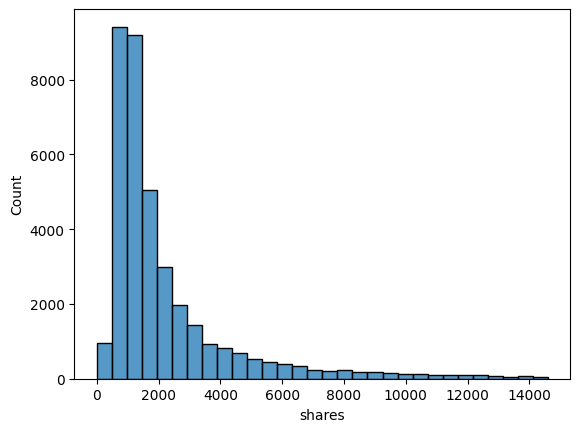

In [80]:
# Visualize key features using plots
# Taking a visual look at the data points

sns.histplot(x='shares', data=df, bins=30)

# Number of shares seems to decrease multiplicatively inversely
# Most articles also appear to have at least some number of shares

<Axes: xlabel='num_imgs', ylabel='Count'>

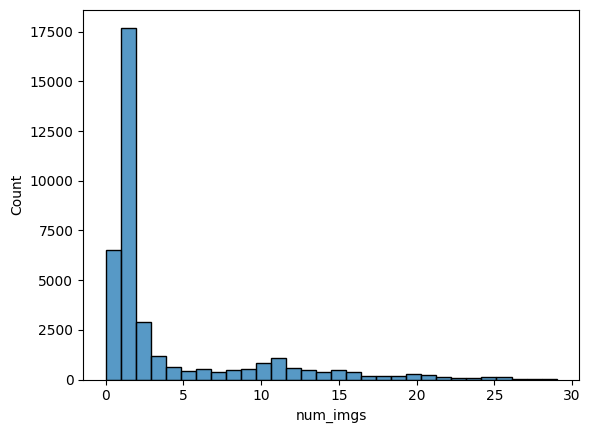

In [81]:
sns.histplot(x='num_imgs', data=df, bins=30)

# Articles appear to usually have one image but other could have dozens or more.

<Axes: xlabel='is_weekend', ylabel='count'>

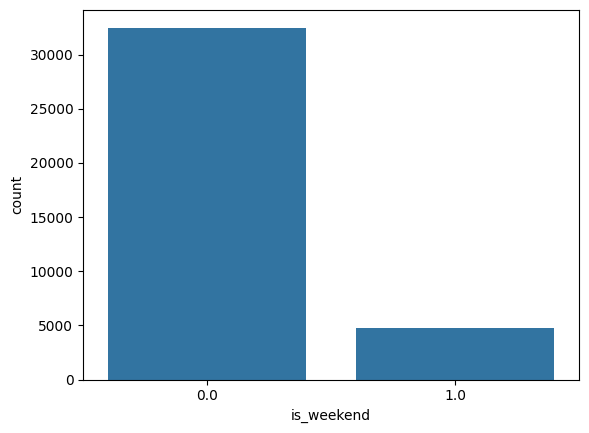

In [82]:
sns.countplot(x='is_weekend', data=df)

# Most articles are published on weekdays

<Axes: xlabel='global_rate_positive_words', ylabel='Count'>

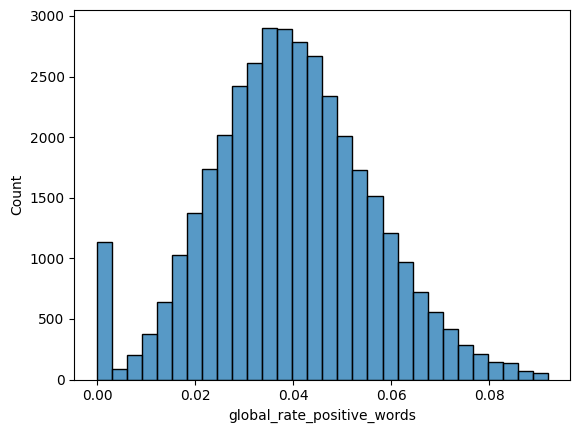

In [83]:
sns.histplot(x='global_rate_positive_words', data=df, bins=30)

# The positive word rate almost follows a standard distribution

In [6]:
# Hypothesis Formulation
# Formulate at least two hypotheses related to the dataset

# Hypothesis 1
# This is a more classical thing to test and might be something that the creator of the dataset
# have analyzed
print('The number of images an article has affects the number of shares.')

# For this hypothesis I believe that a higher image count might lead to higher shares

# Hypothesis 2
# A sightly less conventional but interesting to examine
print('There is a correlation between articles published on weekends and the rate of positive words in the articles')

# For this hypothesis I believe that articles published on the weekends will have higher ratios

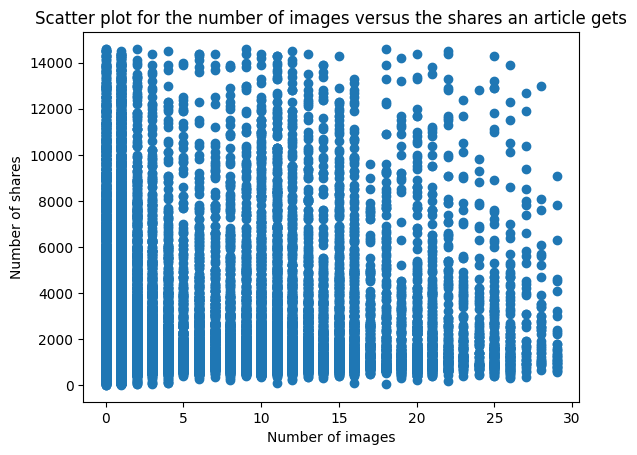

number of images and share count
correlation:  0.09110566886655935
p value:  1.6134238041239723e-69


In [108]:
# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

# Graph of # of images v.s. # of shares 

plt.scatter('num_imgs', 'shares', data=df)
plt.xlabel('Number of images')
plt.ylabel('Number of shares')
plt.title('Scatter plot for the number of images versus the shares an article gets')

plt.show()

statistic, pvalue = stats.pearsonr(df['num_imgs'], df['shares'])

# c = df['num_imgs'].corr(df['shares'])
print("number of images and share count")
print("correlation: ", statistic)
print("p value: ", pvalue)

# The correlation between the two seems to be positive but also low
# The p-value however demonstrates that there is a relationship
# From the graph it looks like that the numbers of shares still vary greatly at several number of images


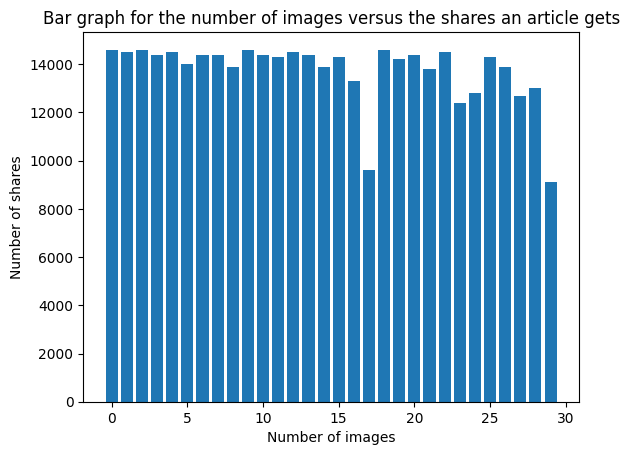

In [102]:
plt.bar('num_imgs', 'shares', data=df)
plt.xlabel('Number of images')
plt.ylabel('Number of shares')
plt.title('Bar graph for the number of images versus the shares an article gets')
plt.show()

# Bar graph will mostly be showing the maximum shares

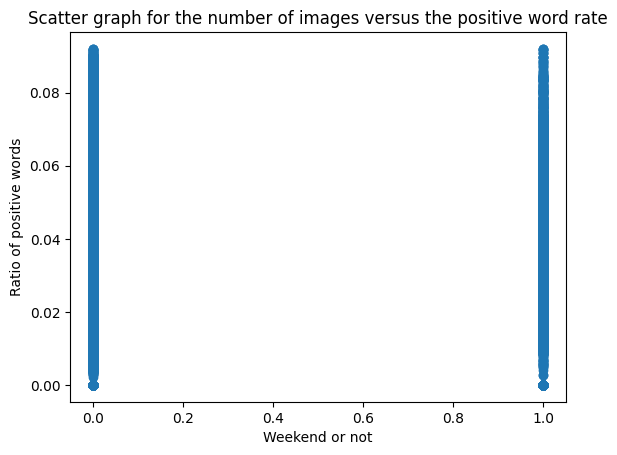

weekend publishing and positive word rate
correlation:  0.02806928679517378
p value:  5.971922426157864e-08


In [110]:
plt.scatter('is_weekend', 'global_rate_positive_words', data=df)
plt.xlabel('Weekend or not')
plt.ylabel('Ratio of positive words')
plt.title('Scatter graph for the number of images versus the positive word rate')
plt.show()

statistic, pvalue = stats.pearsonr(df['is_weekend'], df['global_rate_positive_words'])

# c = df['is_weekend'].corr(df['global_rate_positive_words'])
print("weekend publishing and positive word rate")
print("correlation: ", statistic)
print("p value: ", pvalue)

# The correlation between the two seems to be positive but very low
# The p-value however demonstrates that there is a relationship
# From the graph the ratio of positive word is spread out regardless if the article was published
# on a weekend or not

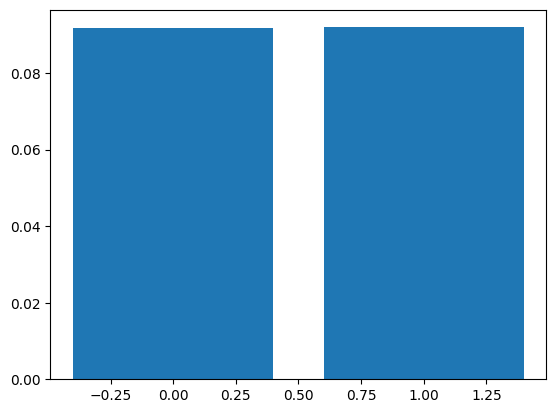

In [97]:
plt.bar('is_weekend', 'global_rate_positive_words', data=df)
plt.xlabel('Weekend or not')
plt.ylabel('Ratio of positive words')
plt.title('Bar graph for the number of images versus the positive word rate')
plt.show()

In [8]:
# Documentation and Reporting
# Document the entire analysis process, including code and explanations
# Summarize key findings in a clear and concise report

"""
For analyzing the dataset for article popularity, I considered the fields for number of images,
if the article was posted on a weekend, the rate of positive words, and the share count.

For my hypothesis I considered the relationship between images and shares as well as the relationship between
positive words and if the article was posted on a weekend.

For each hypothesis I analyzed the relationship using a scatter graph and a bar graph. Additionally, I analyzed
the Pearson correlation for each of the two relationships.

From the graph there was not a clear distinction for hypothesis 1 where it was obvious that having more images
lead to more or less shares. Overall it seemed that both low and high images could have high or low amounts of shares. 
The correlation however tells us that there is a positive relationship between the two fields with a value of approximately 
0.09. The p value is low which shows that the relationship was not by chance. The correlation value is low which means 
that they are weakly connected. It also means that, while only slightly, having more pictures would potentially result in 
a bit more shares.

Similarly for the graph between weekend publishing and positive word ratio, the graph between the two fields looked similar.
The correlation value is positive but very low at approximately 0.03. The p value was also low. This demonstrates that while 
the results might be statistically significant the correlation between having a high positive word ratio and the article being 
published on a weekend is extremely low. 

Overall the findings did somewhat corroborate the hypothesis but also shows that the relationship between the fields
is quite weak.

"""
